In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('data.csv')
df

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [44]:
df.info() # смотрим типы признаков и наличие пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [45]:
# есть пропуски в признаке образование
df.education.isna().sum()/df.shape[0]*100

0.41599479667746175

In [46]:
# так как пропусков не так много заполняю всё модой
ed_mode = df.education.mode()[0]
df.education = df.education.fillna(ed_mode)

In [83]:
df.describe().T # смотрю статистику датасэта

,count,mean,std,min,25%,50%,75%,max
client_id,73799.0,55137.965094,31841.921168,1.000000,27440.500000,55274.000000,82758.500000,110147.000000
age,73799.0,39.280641,11.520378,21.000000,30.000000,37.000000,48.000000,72.000000
decline_app_cnt,73799.0,0.275749,0.804272,0.000000,0.000000,0.000000,0.000000,33.000000
score_bki,73799.0,-1.904724,0.498231,-3.624586,-2.259534,-1.920823,-1.569831,0.199773
bki_request_cnt,73799.0,2.000339,2.252073,0.000000,0.000000,1.000000,3.000000,53.000000
region_rating,73799.0,56.725701,13.055717,20.000000,50.000000,50.000000,60.000000,80.000000
income,73799.0,41099.775417,46166.322400,1000.000000,20000.000000,30000.000000,48000.000000,1000000.000000
first_time,73799.0,2.765458,1.009463,1.000000,2.000000,3.000000,4.000000,4.000000
default,73799.0,0.126994,0.332968,0.000000,0.000000,0.000000,0.000000,1.000000


In [48]:
df[['home_address', 'work_address', 'good_work', 'sna']] = df[['home_address', 'work_address', 'good_work', 'sna']].astype(object)

In [49]:
# смотрю на основные статистики по категориальным переменным
df.describe(include = object)

,app_date,education,sex,car,car_type,good_work,home_address,work_address,sna,foreign_passport
count,73799,73799,73799,73799,73799,73799,73799,73799,73799,73799
unique,120,5,2,2,2,2,3,3,4,2
top,18MAR2014,SCH,F,N,N,0,2,3,1,N
freq,1018,39167,41562,49832,59791,61630,39956,44959,47301,62733


<Axes: xlabel='education', ylabel='count'>

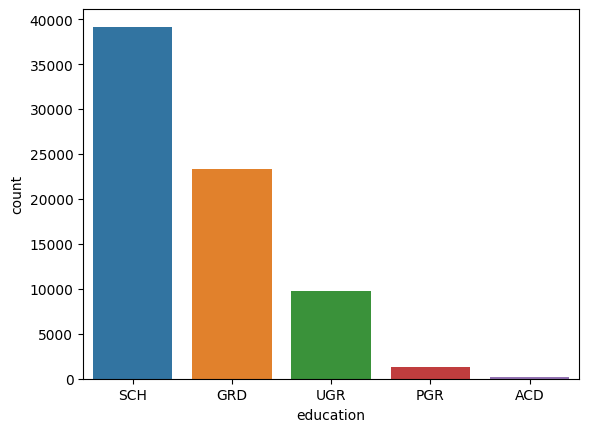

In [50]:
sns.countplot(x = df['education'], data = df)

# Гипотезы:


*   Возраст "хороших" заемщиков больше по сравнению с "плохими" (распределение возраста в зависимости от флага дефолта смещено в большую сторону при default = 0)
*   Уровень образования зависит от возраста, что влияет и на возврат кредита, также люди с высшим образованием чаще являются "хорошими" заемщиками
*  При good_work = 0 увеличивается риск невозврата кредита
(флаг дефолта)
*  Доход "хороших" заемщиков больше, по сравнению с "плохими" (распределения дохода в зависимости от флага дефолта смещено в большую сторону при default = 0)
*  score_bki напрямую взаимосвязан с default, чем он меньше, тем выше вероятность клиента выплатить кредит банку


# Target

   index    percent
0      0  87.300641
1      1  12.699359


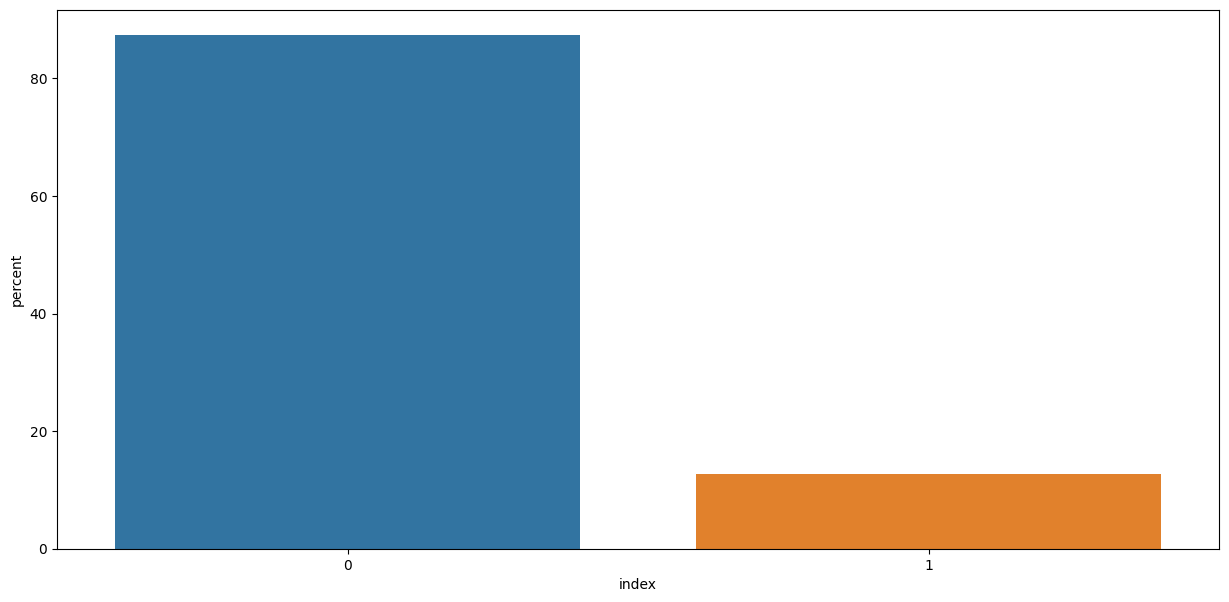

In [51]:
# для начала надо изучить целевую переменную
# нормирование на размер датасэта
norm_target = (df
               .default # подсчитываю количество уникальных значений
               .value_counts(normalize = True) # получаю относительные частоты
               .mul(100) # преобразую в проценты
               .rename('percent')
               .reset_index())

plt.figure(figsize = (15, 7))
ax = sns.barplot(x = 'index', y = 'percent', data = norm_target)
print(norm_target)

В датасэте присутствует дисбаланс классов, при обучении модели это стоит учитывать

# Age

Text(2.4452638888888902, 0.5, 'Density')

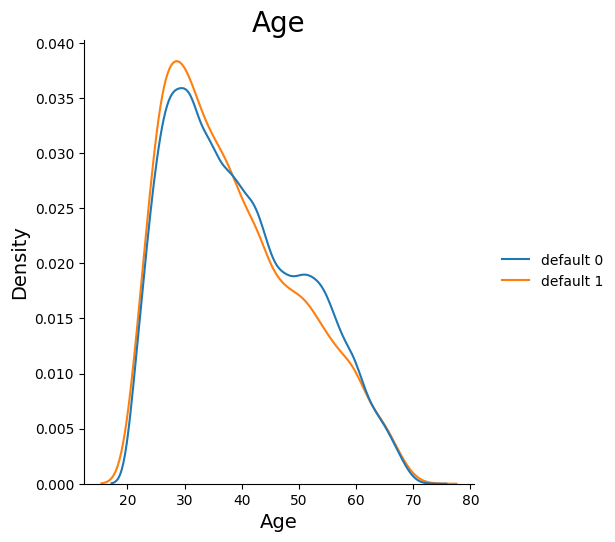

In [52]:
# нормирую на размер класса
sns.displot(
    {
        "default 0": df[df.default == 0].age,
        "default 1": df[df.default == 1].age
    },
    kind = "kde",
    common_norm = False # независимая нормализация каждого подмножества
)

plt.title('Age', fontsize = 20)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

In [53]:
df.groupby('default')['age'].median()

default
0    38.0
1    36.0
Name: age, dtype: float64

In [54]:
df.groupby('default')['age'].mean()

default
0    39.390504
1    38.525395
Name: age, dtype: float64

In [55]:
df.groupby('default')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,age
0,0,31
1,1,26


Есть небольшие различия по возрасту в разрезе default, гипотеза подтвердилась

# Education

Text(15.131611111111107, 0.5, 'Density')

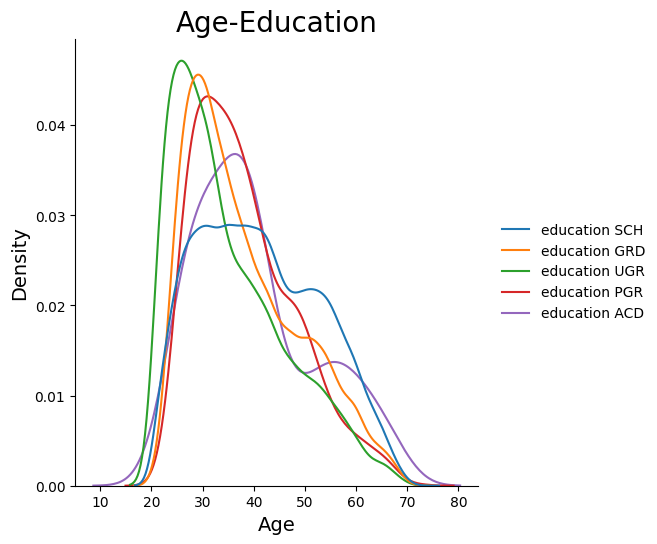

In [56]:
sns.displot(
    {
        "education SCH": df[df.education == 'SCH'].age,
        "education GRD": df[df.education == 'GRD'].age,
        "education UGR": df[df.education == 'UGR'].age,
        "education PGR": df[df.education == 'PGR'].age,
        "education ACD": df[df.education == 'ACD'].age,
    },
    kind = "kde",
    common_norm = False
)

plt.title('Age-Education', fontsize = 20)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

Если берем образование SCH, то возраст смещен в другую сторону, по сравнению с тем же UGR. Для ACD (академик) характерно смещено распределение возраста влево, если сравниваем  с PGR (аспирант), что и понятно в принципе. Самые молодые - UGR, есть предположение, что в больщей степени они будут являться "плохими" заемщиками.

Text(0, 0.5, 'Density')

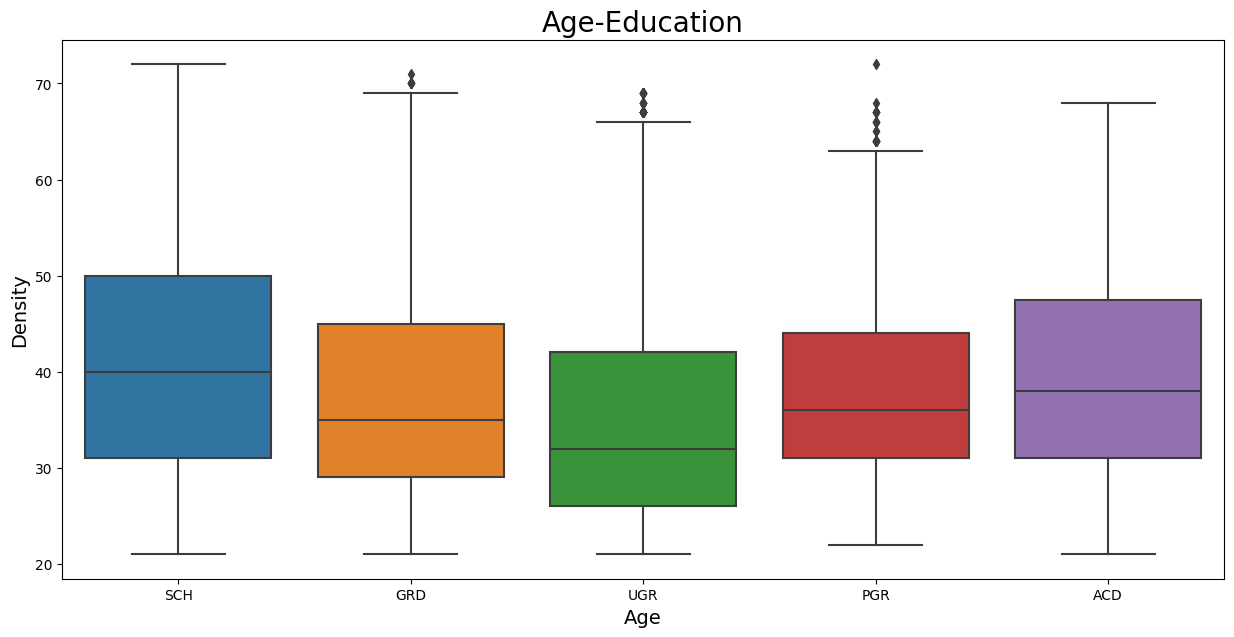

In [57]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'education', y = 'age', data = df)
plt.title('Age-Education', fontsize = 20)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

Text(0, 0.5, 'Age')

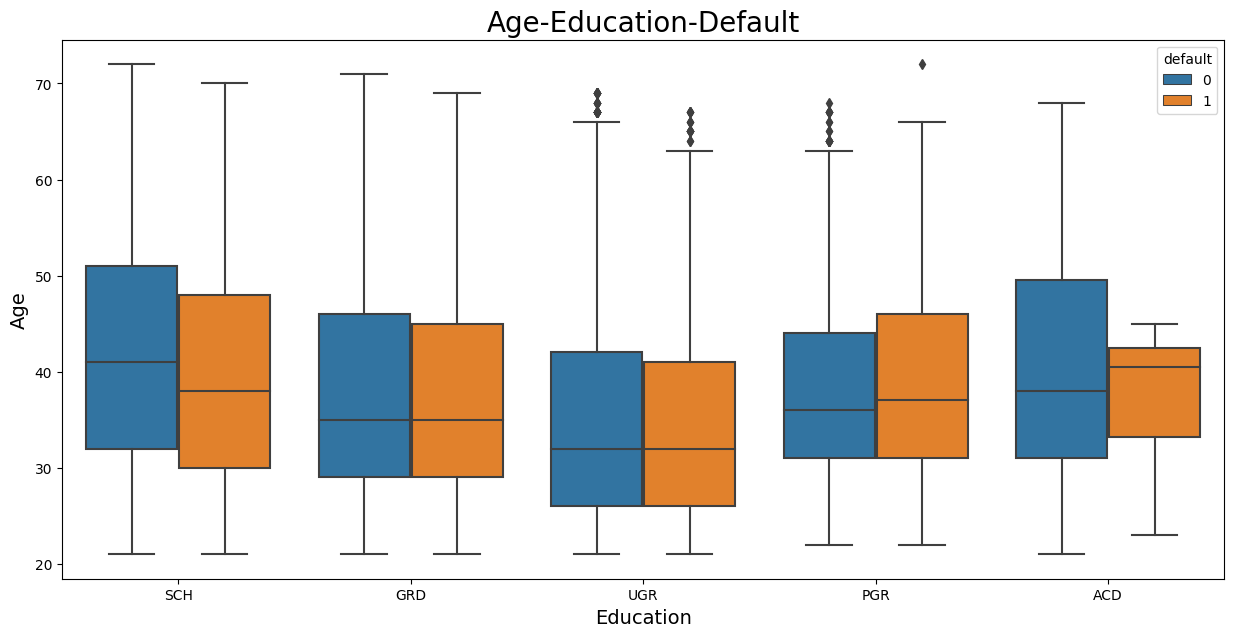

In [58]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'education', y = 'age', hue = 'default', data = df)
plt.title('Age-Education-Default', fontsize = 20)
plt.xlabel('Education', fontsize = 14)
plt.ylabel('Age', fontsize = 14)

Интересно, что если мы берем уровень образования PGR и ACD, то среднее значение возраста у "плохих" заемщиков выше, чем у "хороших", но сам разброс значений и у тех и у тех также высокий. Возможно, если мы берем какой-то предел возраста, например, от 30 до 50 лет, то внутри этой группы данный показатель не сильно будет влиять на полную выплату кредита.

In [59]:
df.groupby('education')['age'].median()

education
ACD    38.0
GRD    35.0
PGR    36.0
SCH    40.0
UGR    32.0
Name: age, dtype: float64

   default education  percentage
4        0       ACD    0.288699
9        1       ACD    0.085361
1        0       GRD   32.998588
6        1       GRD   22.460521
3        0       PGR    1.825322
8        1       PGR    0.864277
0        0       SCH   51.655362
5        1       SCH   62.814767
2        0       UGR   13.232030
7        1       UGR   13.775075


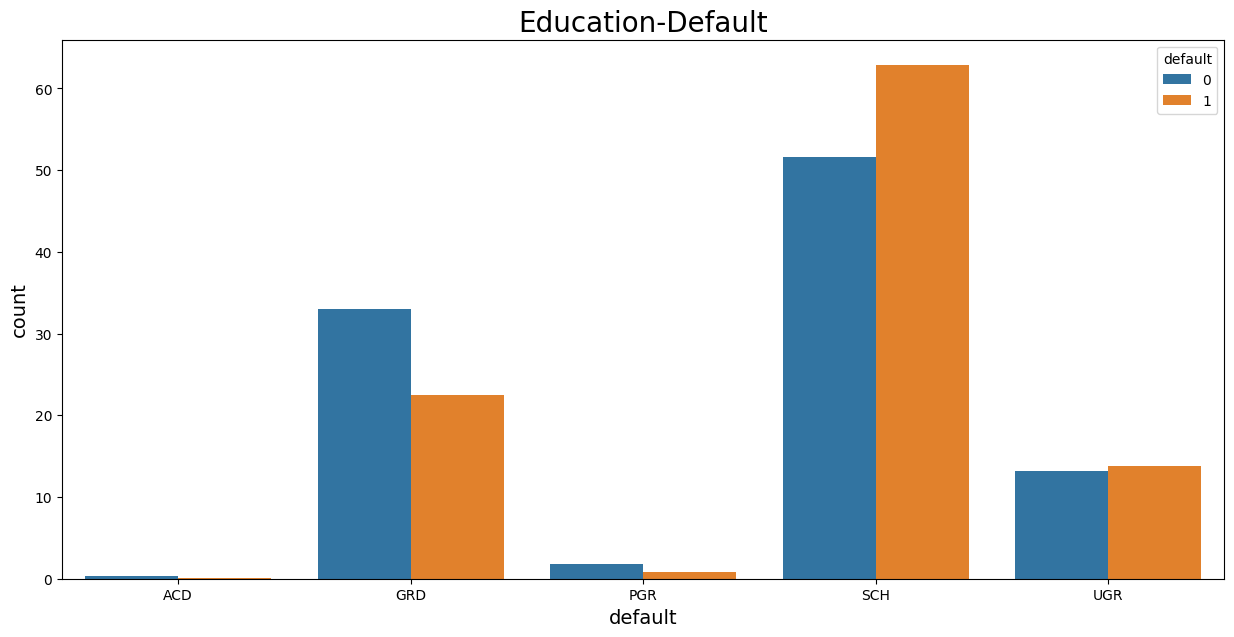

In [60]:
plt.figure(figsize = (15, 7))

educ_def = (df.
            groupby(['default'])['education']
            .value_counts(normalize = True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education')
            )

ax = sns.barplot(x = "education", y = "percentage", hue = "default", data = educ_def)
plt.title('Education-Default', fontsize = 20)
plt.xlabel('default', fontsize = 14)
plt.ylabel('count', fontsize = 14)
print(educ_def)

Видим, что процент недобросовестных заемщиков выше с уровнем образования SCH, для UGR разница незначительна. Скорее в данном случае влияет не как сам возраст, а уровень образования. Также можно отметить, что в какой-то степени GRD - более стабильны в плане выплат.

# Корреляция

<ipython-input-86-de5d825f317c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[num_cols].corr(method = 'spearman'), annot = True, fmt = ".1f")


<Axes: >

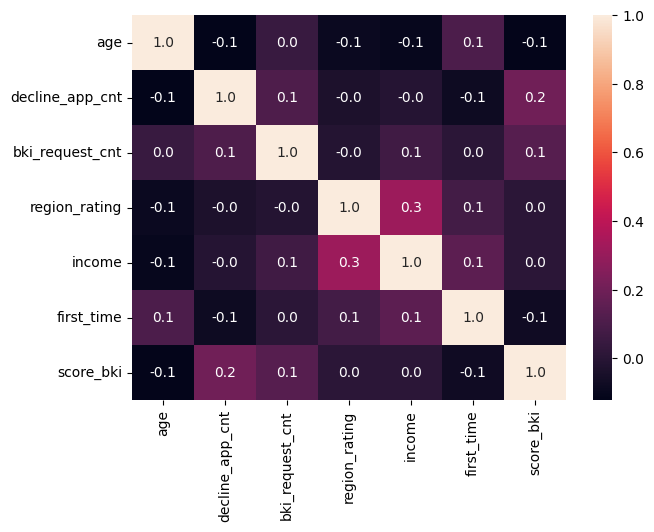

In [86]:
num_cols = ['age', 'decline_app_cnt', 'good_work', 'bki_request_cnt', 'region_rating', 'income', 'sna', 'first_time', 'score_bki']
plt.figure(figsize = (7, 5))
sns.heatmap(df[num_cols].corr(method = 'spearman'), annot = True, fmt = ".1f")

# Income

<Axes: >

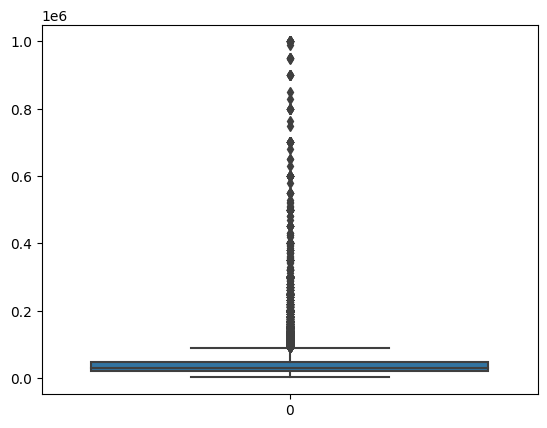

In [62]:
sns.boxplot(df['income'])

In [63]:
# избавляемся от выбросов

ds = df.copy()

Q1 = np.percentile(ds['income'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(ds['income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

old = ds.shape[0]
print("Old Shape: ", ds.shape)

upper = np.where(ds['income'] >= (Q3 + 1.5*IQR))
lower = np.where(ds['income'] <= (Q1 - 1.5*IQR))

ds.drop(upper[0], inplace = True)
ds.drop(lower[0], inplace = True)

new = ds.shape[0]
print('New Shape:' , ds.shape)

Old Shape:  (73799, 19)
New Shape: (68594, 19)


<ipython-input-63-9224471dddd9>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(ds['income'], 25,
<ipython-input-63-9224471dddd9>:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(ds['income'], 75,


In [64]:
print(f'Потеряли  {np.round((1 - new/old) * 100,2)}% данных')

Потеряли  7.05% данных


<Axes: >

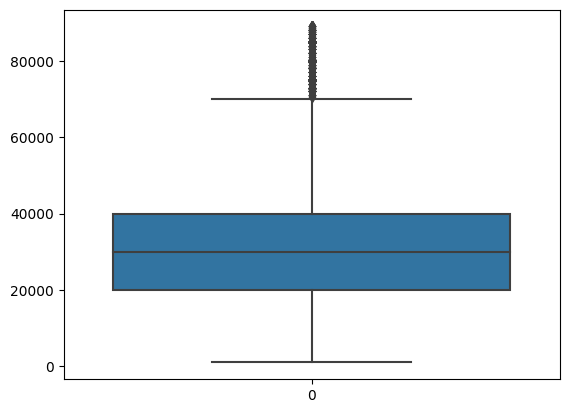

In [65]:
sns.boxplot(ds['income'])

Text(15.073174382716049, 0.5, 'Density')

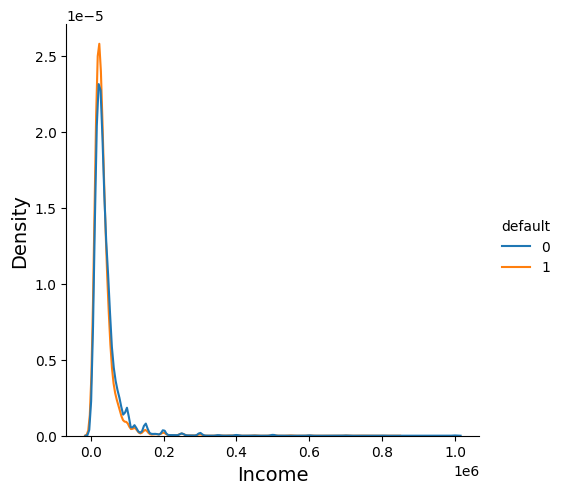

In [66]:
sns.displot(df, x = 'income', hue = 'default', kind = "kde", common_norm = False)

plt.xlabel('Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

Text(0, 0.5, 'Income')

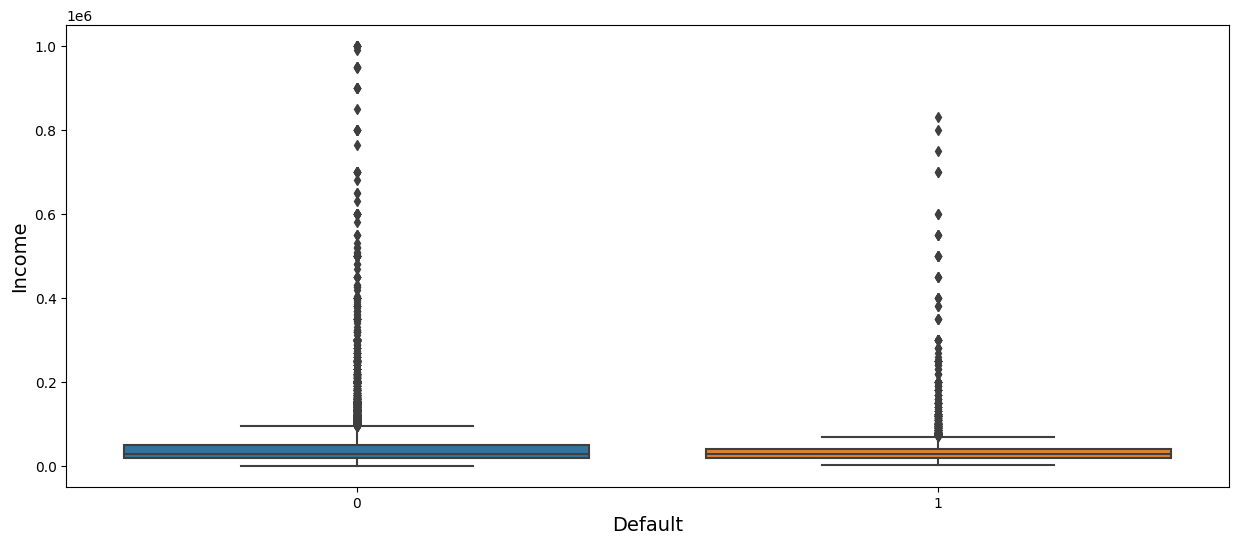

In [67]:
plt.figure(figsize = (15, 6))

sns.boxplot(x = 'default', y = 'income', data = df)

plt.xlabel('Default', fontsize = 14)
plt.ylabel('Income', fontsize = 14)

In [68]:
# так как признак распределен ненормально, прологарифмируем
df_income = df.copy()
df_income.income = np.log(df.income + 1)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

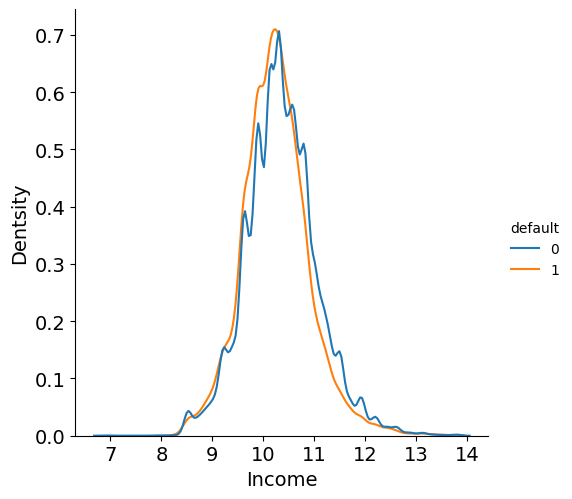

In [69]:
sns.displot(df_income, x = 'income', hue = 'default', kind = "kde", common_norm = False)

plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [70]:
df.groupby('default')['income'].mean()

default
0    41799.713288
1    36288.113316
Name: income, dtype: float64

In [71]:
df.groupby('default')['income'].median()

default
0    30000.0
1    28000.0
Name: income, dtype: float64

Text(23.881611111111106, 0.5, 'Density')

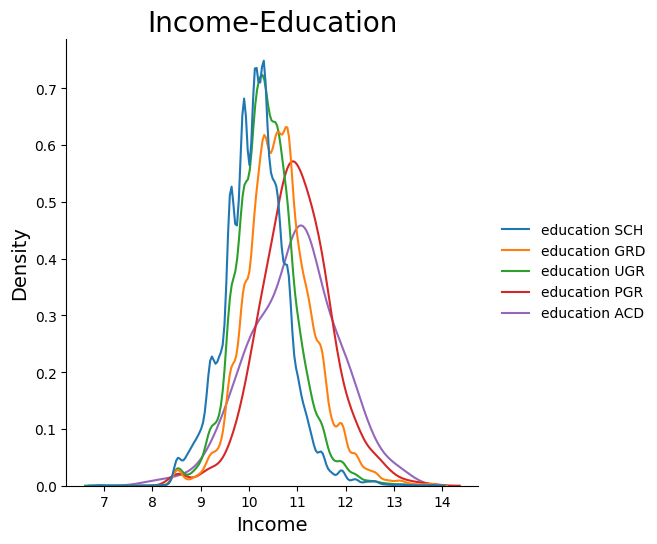

In [72]:
sns.displot(
    {
        "education SCH": df_income[df_income.education == 'SCH'].income,
        "education GRD": df_income[df_income.education == 'GRD'].income,
        "education UGR": df_income[df_income.education == 'UGR'].income,
        "education PGR": df_income[df_income.education == 'PGR'].income,
        "education ACD": df_income[df_income.education == 'ACD'].income
    },
    kind = "kde",
    common_norm = False
)

plt.title('Income-Education', fontsize = 20)
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

# Моделирование методом бинарной классификации

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [74]:
categ_cols = ['app_date', 'education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address', 'foreign_passport', 'sna']

df_label = pd.get_dummies(df, columns = categ_cols, drop_first = True)
df_label[:5] # бинаризация категориальных признаков

<ipython-input-74-b9b45991d150>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_label = pd.get_dummies(df, columns = categ_cols, drop_first = True)
<ipython-input-74-b9b45991d150>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_label = pd.get_dummies(df, columns = categ_cols, drop_first = True)
<ipython-input-74-b9b45991d150>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_label = pd.get_dummies(df, columns = categ_cols, drop_first = True)
<ipython-input-74-b9b45991d150>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_label = pd.get_dummies(df, columns =

,client_id,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default,app_date_01FEB2014,...,car_type_Y,good_work_1,home_address_2,home_address_3,work_address_2,work_address_3,foreign_passport_Y,sna_2,sna_3,sna_4
0,25905,62,0,-2.008753,1,50,18000,1,0,1,...,1,0,0,0,1,0,0,0,0,1
1,63161,59,0,-1.532276,3,50,19000,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,25887,25,2,-1.408142,1,80,30000,4,0,1,...,0,0,0,0,1,0,1,0,0,0
3,16222,53,0,-2.057471,2,50,10000,3,0,0,...,0,0,1,0,0,1,0,0,0,0
4,101655,48,0,-1.244723,1,60,30000,4,0,0,...,0,1,1,0,0,1,1,0,0,0


In [75]:
categ_cols = ['app_date', 'education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address', 'foreign_passport', 'sna']

df_label = pd.get_dummies(df, columns = categ_cols, drop_first = True)
df_label[:5] # бинаризация категориальных признаков

# выбираю целевую переменную
X = df_label.drop('default', axis=1)
y = df_label['default']

# разделяю данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state = 42)

In [77]:
# инициализирую модель (в данном случае логистическую регрессию)
model = LogisticRegression(solver = 'liblinear')

# обучаю модель на обучающей выборке
model.fit(X_train, y_train)

y_pred  = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# print("Weights of classes:", 1 / model.coef_)
print(f"LogisticRegression accuracy score: {accuracy_score(y_test, y_pred)}")

Confusion Matrix:
[[16107     0]
 [ 2343     0]]
LogisticRegression accuracy score: 0.8730081300813008


Матрица неточностей дает понять, что распределение целевой переменной несбалансированно.

In [78]:
# выполняю балансировку
classes = df_label.default.value_counts(ascending=True) # подсчитывается количество примеров для каждого значения в столбце default
# создается поднабор данных, который содержит примеры мажоритарного класса
minor = df_label[df_label.default == classes.index[0]] # classes.index[0] для выбора значения, представляющего мажоритарный класс.
# создается поднабор данных, который содержит примеры миноритарных классов
other = df_label[df_label.default.isin(classes.index[1:])][:classes.iloc[0]] # classes.index[1:] выбирает все значения,
# представляющие миноритарные классы, и [:classes.iloc[0]] ограничивает количество примеров из этих классов до количества примеров в мажоритарном классе
data_train_balanced = pd.concat([other, minor])

# выбираю целевую переменную
X = data_train_balanced.drop('default', axis=1)
y = data_train_balanced['default']

# разделяю данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state = 42)

# инициализирую модель (в данном случае логистическую регрессию)
model_balanced = LogisticRegression(solver = 'liblinear')

# обучаю модель на обучающей выборке
model_balanced.fit(X_train, y_train)

y_pred  = model_balanced.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print(f"LogisticRegression accuracy score: {accuracy_score(y_test, y_pred)}")

Confusion Matrix:
[[1652  691]
 [ 877 1466]]
LogisticRegression accuracy score: 0.6653862569355528


По confusion matrix видим, что теперь модель угадывает и дефолтных и не дефолтных равномерно.

# Моделирование методом CatBoost

In [79]:
!pip install catboost
from catboost import CatBoostClassifier

In [80]:
# инициализирую и обучаю модель CatBoost
model = CatBoostClassifier(iterations = 150, depth = 10, learning_rate = 0.05, loss_function='Logloss')
model.fit(X_train, y_train)

# делаю предсказания на тестовой выборке
predictions = model.predict(X_test)

# Рассчитываю и выводим матрицу неточностей
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# оцениваю точность модели
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

0:	learn: 0.6823916	total: 98.1ms	remaining: 14.6s
1:	learn: 0.6722003	total: 172ms	remaining: 12.7s
2:	learn: 0.6642103	total: 247ms	remaining: 12.1s
3:	learn: 0.6561813	total: 313ms	remaining: 11.4s
4:	learn: 0.6495629	total: 382ms	remaining: 11.1s
5:	learn: 0.6439616	total: 453ms	remaining: 10.9s
6:	learn: 0.6373978	total: 525ms	remaining: 10.7s
7:	learn: 0.6317579	total: 669ms	remaining: 11.9s
8:	learn: 0.6265701	total: 798ms	remaining: 12.5s
9:	learn: 0.6222059	total: 943ms	remaining: 13.2s
10:	learn: 0.6181416	total: 1.03s	remaining: 13.1s
11:	learn: 0.6136822	total: 1.12s	remaining: 12.9s
12:	learn: 0.6098637	total: 1.21s	remaining: 12.8s
13:	learn: 0.6062755	total: 1.3s	remaining: 12.7s
14:	learn: 0.6014868	total: 1.41s	remaining: 12.7s
15:	learn: 0.5982382	total: 1.5s	remaining: 12.5s
16:	learn: 0.5945434	total: 1.57s	remaining: 12.3s
17:	learn: 0.5916168	total: 1.64s	remaining: 12s
18:	learn: 0.5890590	total: 1.71s	remaining: 11.8s
19:	learn: 0.5860307	total: 1.79s	remaining:

# Графики

In [81]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

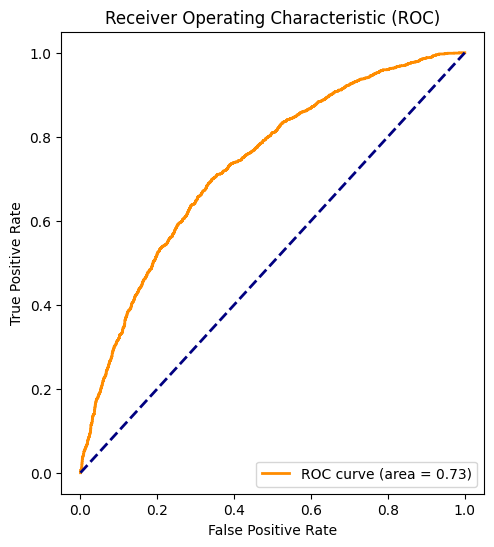

In [82]:
# Получаем вероятности принадлежности к классу 1
y_probs = model.predict_proba(X_test)[:, 1]

# ROC-кривая и AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Precision-Recall кривая и AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Строим графики
plt.figure(figsize=(12, 6))

# ROC-кривая
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

ROC AUC вычисляет площадь под ROC-кривой. Она измеряет общую производительность модели на всем диапазоне возможных значений порога классификации. Значение 0.74 показывает, что модель имеет хорошую способность предсказывать результаты лучше, чем случайное предсказание.